<a href="https://colab.research.google.com/github/jendives2000/regressions/blob/main/Linear%20Regressions%20Practice%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

You are working as a data scientist for a retail company. The management wants to understand the **relationship between the number of online customer reviews for a product and the monthly sales figures for that product**. They believe that **more reviews should correlate with higher sales** but want to quantify this relationship to guide marketing strategies.

# **Problem**

Using the provided dataset, perform a **linear regression analysis** to determine the relationship between:
*   the number of customer reviews (independent variable 𝑋)
*   and monthly sales (dependent variable 𝑌).

**Calculate the Pearson correlation coefficient to assess the strength of this relationship.**


---



### Dataset
We get a random dataset of 120 rows:

In [4]:
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate a dataset with 120 rows
n = 120
X = np.random.randint(10, 500, size=n)  # Number of customer reviews (random integers between 10 and 500)
Y = X * 0.5 + np.random.normal(0, 25, size=n)  # Monthly sales figures with some added noise

# Create a DataFrame
df = pd.DataFrame({'Customer Reviews (X)': X, 'Monthly Sales (Y)': Y})

# Save the dataset to a CSV file
df.to_csv('customer_reviews_sales_data.csv', index=False)

# Display the first few rows of the dataset
df.head()

,Customer Reviews (X),Monthly Sales (Y)
0,112,64.590457
1,445,178.423996
2,358,187.102099
3,280,130.372943
4,116,41.076950


From the dataset we know that:  
n = 120


---



### Arrays for X and Y
We now need to gather all the values of the variable x and the ones of y into separate arrays:

In [5]:
# getting all the x values into a variable:

x_values = df['Customer Reviews (X)'].values

# getting all the y values into a variable:

y_values = df['Monthly Sales (Y)'].values


### Computation of the PCC
Here is the Pearson r Correlation Coefficient formula:   

$$
r = \frac{n(\sum XY) - (\sum X)(\sum Y)}{\sqrt{[n\sum X^2 - (\sum X)^2][n\sum Y^2 - (\sum Y)^2]}}
$$

Let's calculate it using numpy!

In [6]:
import numpy as np

def pearson_correlation_coefficient(x, y):
    """
    Args:
        x: The first array.
        y: The second array.

    Returns:
        The Pearson correlation coefficient.
    """

    # Calculate the sums and sums of squares
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x ** 2)
    sum_y_squared = np.sum(y ** 2)

    # Calculate the numerator and denominator of the formula
    numerator = n * sum_xy - sum_x * sum_y
    denominator = np.sqrt((n * sum_x_squared - sum_x ** 2) * (n * sum_y_squared - sum_y ** 2))

    # Return the Pearson correlation coefficient
    return numerator / denominator

pcc = pearson_correlation_coefficient(x_values, y_values)
print(round(pcc, 3))


0.943


$$
r = 0.943
$$

The result of the Pearson r correlation coefficient is in the nineties. This indicates **a strong relation between the variable x and y.**

## Conclusion

The Pearson correlation coefficient and the linear regression analysis both indicate a **strong positive relationship** between **the number of reviews and the monthly sales**.

This suggests that, **as the number of reviews increases, sales of that product increase as well.**

### Recommendations: 

#### a. Refine Data on Reviews Sentiments
To gain deeper insights, I recommend that **the Marketing team collaborates with the Data team** to refine the analysis by **examining different types of reviews** (e.g., positive, negative, and spam) and their specific impact on sales. This would provide a **more nuanced understanding** of how various review sentiments influence customer behavior.  

#### b. Time-based Analysis
Additionally, I suggest incorporating **a time-based analysis to identify seasonal patterns** in the relationship between review types, their volume, and sales impact. Understanding these patterns could **help tailor the marketing strategy** to leverage key periods more effectively, optimizing promotional efforts based on new, time-sensitive insights.  

Examine **the frequency and timing of reviews** to understand how they **correlate with sales spikes**. This analysis can reveal **whether sales are more affected by recent reviews or by a cumulative effect over time**. Leveraging this information can help in planning review-generation campaigns to coincide with peak sales periods.

#### c. Segment Analysis by Product Categories
Conduct a **segmented analysis to determine if the relationship between reviews and sales varies by product category**. This could help the Marketing team create more tailored strategies, focusing on categories where reviews have the most significant impact.

#### d. Monitor Competitor Reviews:  
Extend the analysis to **include competitor products and their reviews**. Understanding how competitor reviews impact their sales could help identify opportunities for differentiation and improvement in your marketing strategies.

#### e. Integrate Other Data Sources: 
**Combine this analysis with other relevant data sources**, such as pricing, promotions, or product availability, to **understand the broader context**. This multi-variable analysis can **help pinpoint additional factors** influencing sales and optimize the overall strategy accordingly.



---



### Visualization
Let's visualize it:

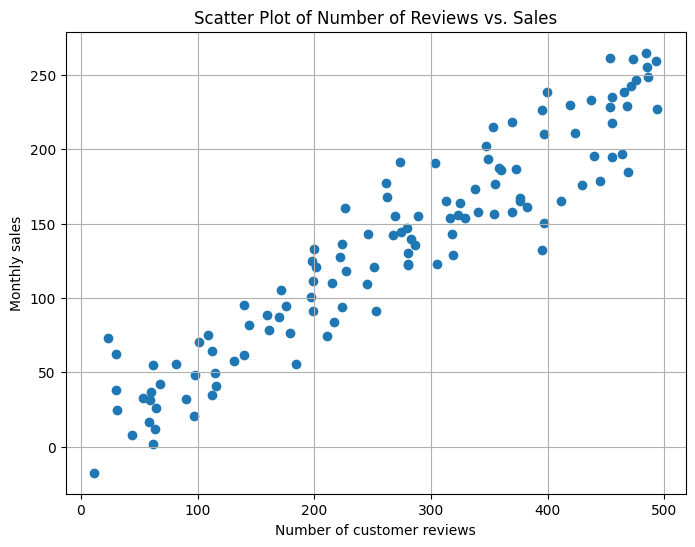

In [7]:
# Assuming your dataset is in a pandas DataFrame called 'df'
# with columns 'advertising_spending' and 'revenue'

plt.figure(figsize=(8, 6))
plt.scatter(df['Customer Reviews (X)'], df['Monthly Sales (Y)'])
plt.xlabel('Number of customer reviews')
plt.ylabel('Monthly sales')
plt.title('Scatter Plot of Number of Reviews vs. Sales')
plt.grid(True)
plt.show()

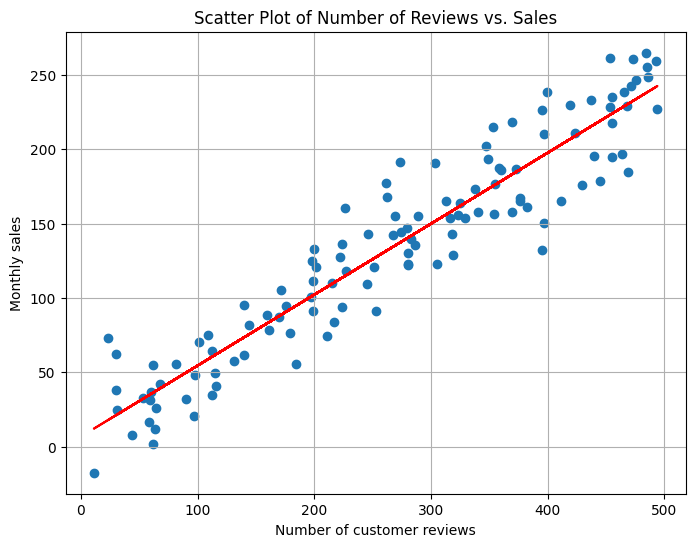

In [8]:
from scipy import stats

# Perform linear regression
slope, intercept, _, _, _ = stats.linregress(x_values, y_values)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values)

# Create the regression line
regression_line = slope * x_values + intercept
plt.plot(x_values, regression_line, color='red')

plt.xlabel('Number of customer reviews')
plt.ylabel('Monthly sales')
plt.title('Scatter Plot of Number of Reviews vs. Sales')
plt.grid(True)
plt.show()